In [1]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils.np_utils import to_categorical
import VariantCalling as vc
import numpy as np
import matplotlib.pyplot as plt

In [63]:
img_row, img_col = 101, 178
nb_epoch = 50
batch_size = 16
nb_filters = 6
nb_conv = 8
nb_pool = 8

[0.4898595887908764, 0.17504850159654275, 0.33509190961258084]


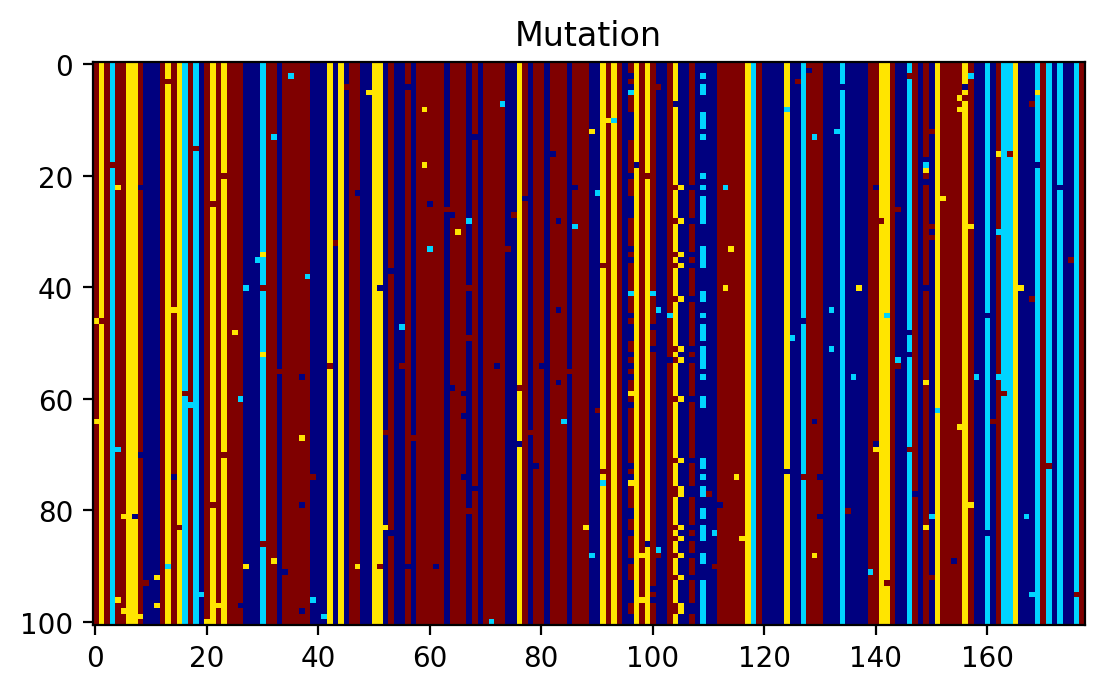

In [2]:
"""
This section to test ratio_gen, which is wrapper for alignments
"""
dg = vc.VariantCallingData()
alignments, prob_lists = dg.simulate_clones(10,100,0.01,0.01)
alignments_int = dg.char_to_int(alignments)
alignment_int = dg.char_to_int(alignments[0])
plt.rcParams['figure.dpi'] = 200
#alignment_idx = mutation_types.index(mutation_index)
plt.title("Mutation")
plt.imshow(alignment_int,cmap='jet')
print(prob_lists[0])

In [56]:
"""
This section to test ratio_gen, which is wrapper for alignments
"""
dg = vc.VariantCallingData()
alignments, prob_lists = dg.simulate_clones(2000,100,0.01,0.01)


In [57]:
print(len(alignments[0]))
alignments = [dg._array_dup(i,101) for i in alignments]
print(len(alignments))
print(alignments[8].shape)
print(alignments[8])
alignments_int = dg.char_to_int(alignments)

101
2000
(2, 101, 178)
[[['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]

 [['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]]


In [58]:
print(alignments[8].shape)
print(alignments[8])
alignments_int = dg.char_to_int(alignments)

(2, 101, 178)
[[['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]

 [['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]]


In [59]:
rng = np.random.default_rng(seed=42) # use a fixed random generator so runs are consistent
idxs = np.arange(alignments_int.shape[0])

rng.shuffle(idxs)

split_idx = int(alignments_int.shape[0]*0.8)
train_alignments, valid_alignments = alignments_int[idxs[:split_idx]], alignments_int[idxs[split_idx:]]
train_prob_lists, valid_prob_lists = np.array(prob_lists)[idxs[:split_idx]], np.array(prob_lists)[idxs[split_idx:]]
#train_mutation_types, valid_mutation_types = mutation_types[idxs[:split_idx]], mutation_types[idxs[split_idx:]]
print(train_alignments.shape)
print(train_prob_lists.shape)

(1600, 2, 101, 178)
(1600, 3)


In [64]:
img_row = 101
img_col = 178
print(train_alignments.shape)
print(valid_alignments.shape)


train_alignments = train_alignments.reshape(train_alignments.shape[0], img_row, img_col, 2)
valid_alignments = valid_alignments.reshape(valid_alignments.shape[0], img_row, img_col, 2)

train_alignments = train_alignments.astype('float32')
valid_alignments = valid_alignments.astype('float32')

train_alignments /= 3
valid_alignments /= 3


(1600, 101, 178, 2)
(400, 101, 178, 2)


In [69]:
model = Sequential()
model.add(Conv2D(nb_filters, nb_conv, nb_conv))
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))
model.add(Activation('relu'))
#model.add(Conv2D(nb_filters, nb_conv, nb_conv))
#model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))
#model.add(Dropout(0.5))
#model.add(Activation('relu'))
#model.add(Conv2D(nb_filters, nb_conv, nb_conv))
#model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(metrics=['mse'],loss='categorical_crossentropy',optimizer='adam')

In [70]:
trained_model = model.fit(train_alignments, train_prob_lists, batch_size = batch_size, epochs = 50,  verbose = 1, validation_data = (valid_alignments, valid_prob_lists))

Epoch 1/50
100/100 [==============================] - 3s 7ms/step - loss: 1.0964 - mse: 0.0316 - val_loss: 1.0553 - val_mse: 0.0235
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 1.0466 - mse: 0.0213 - val_loss: 1.0324 - val_mse: 0.0190
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 1.0406 - mse: 0.0202 - val_loss: 1.0310 - val_mse: 0.0187
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 1.0399 - mse: 0.0201 - val_loss: 1.0309 - val_mse: 0.0188
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 1.0387 - mse: 0.0199 - val_loss: 1.0293 - val_mse: 0.0185
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 1.0382 - mse: 0.0198 - val_loss: 1.0301 - val_mse: 0.0186
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 1.0374 - mse: 0.0197 - val_loss: 1.0274 - val_mse: 0.0181
Epoch 8/50
100/100 [==============================] - 1s 5ms/step - loss: 1.

In [71]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (16, 12, 22, 6)           774       
                                                                 
 max_pooling2d_28 (MaxPoolin  (16, 1, 2, 6)            0         
 g2D)                                                            
                                                                 
 activation_93 (Activation)  (16, 1, 2, 6)             0         
                                                                 
 flatten_17 (Flatten)        (16, 12)                  0         
                                                                 
 dense_68 (Dense)            (16, 2048)                26624     
                                                                 
 activation_94 (Activation)  (16, 2048)                0         
                                                     

In [79]:
print(model.predict(valid_alignments[8].reshape(1,img_row,img_col,2)))
#print(valid_prob_lists[0])
print(valid_prob_lists[8])

1/1 [==============================] - 0s 17ms/step
[[0.39991397 0.18762028 0.41246572]]
[0.64205068 0.10775372 0.25019559]
